## Lab 7. Unsupervised Learning Solutions

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering 
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as shc

from sklearn.preprocessing import MinMaxScaler

import warnings
warnings.filterwarnings('ignore')

## Insurance customer segmentation

Help a medical insurance company understand customer segments and the likelihod of a major insurance claim for each of the segments 

- Import insurance2.csv into a Pandas data frame
- Create a features array and include only the following numerical features: `['age', 'bmi']`
- Create a label array from the 'insuranceclaim' column
- Compute an agglomerative clustering dendrogram using Ward linkage mehod. How many custers do you see?
- Plot the silhouette score vs number of clusters and use it to make a decision on the number of clusters
- Train an agglomerative clustering model
- Create a pairplot of your data and color-code it by the cluster label. Inspect the resuting cluster structure
- Repeat cluster analysis using K-means. Explain the differences between the results of HCA vs K-Means
- __bonus__: ss there a statistically significant association between the cluster labels and the target variable (y) in our dataset? We can test this using a chi-square test on the contingency table (crosstab) between the two variables

In [2]:
df = pd.read_csv("../data/insurance2.csv")
y = df['insuranceclaim'].to_numpy()
features = ['age', 'bmi']
X = df[features].to_numpy()

In [3]:
sc = MinMaxScaler()
Xs = sc.fit_transform(X)

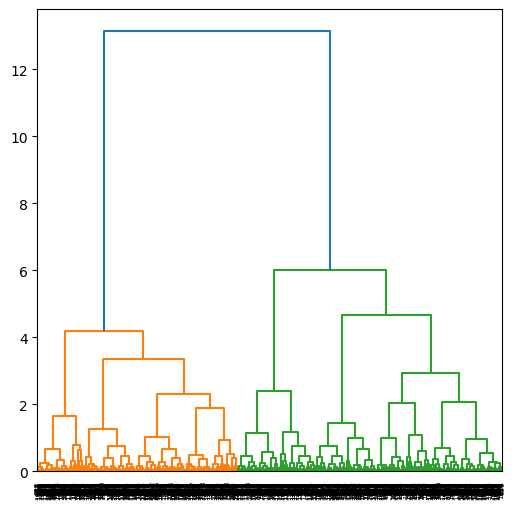

In [4]:
plt.figure(figsize =(6, 6)) 
Dendrogram = shc.dendrogram((shc.linkage(Xs, method ='ward'))) 

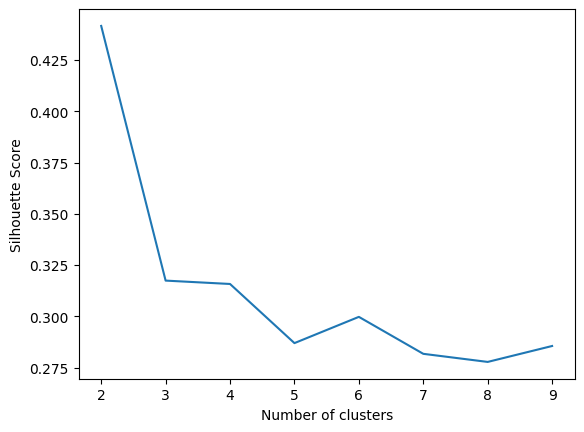

In [5]:
silhouette_scores = [] 

for i in range(2, 10):
    silhouette_scores.append(silhouette_score(Xs, AgglomerativeClustering(n_clusters = i).fit_predict(Xs))) 
    
plt.plot(range(2, 10), silhouette_scores) 
plt.xlabel('Number of clusters', fontsize = 10) 
plt.ylabel('Silhouette Score', fontsize = 10) 
plt.show() 

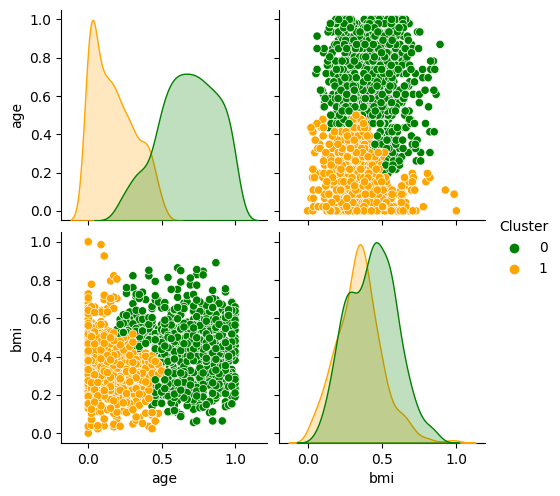

In [6]:
n_clust = 2

agg = AgglomerativeClustering(n_clusters=n_clust, linkage = 'ward')
agg.fit(Xs)
df1 = pd.DataFrame(Xs)
df1.columns = features
df1['Cluster'] = AgglomerativeClustering(n_clusters = 2).fit_predict(Xs)
sns.pairplot(data = df1, hue = 'Cluster', palette=['green','orange', 'blue', 'yello', 'black'][:n_clust]);

In [7]:
pd.crosstab(y, df1['Cluster'], normalize = 'columns')

Cluster,0,1
row_0,,
0,0.347769,0.503472
1,0.652231,0.496528


In [8]:
from scipy.stats import chi2_contingency

chi2_contingency(pd.crosstab(y, df1['Cluster']))

(32.123961890379405,
 1.4464228206449e-08,
 1,
 array([[316.07623318, 238.92376682],
        [445.92376682, 337.07623318]]))

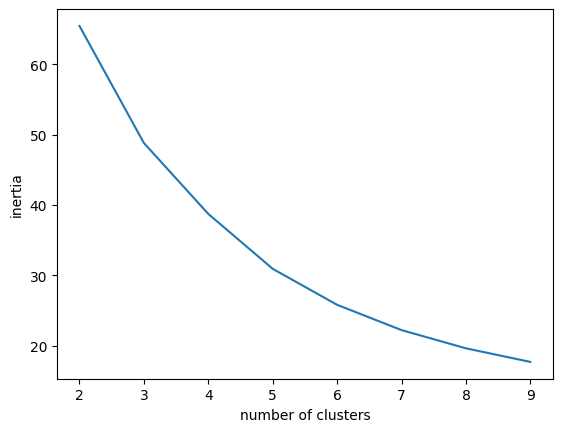

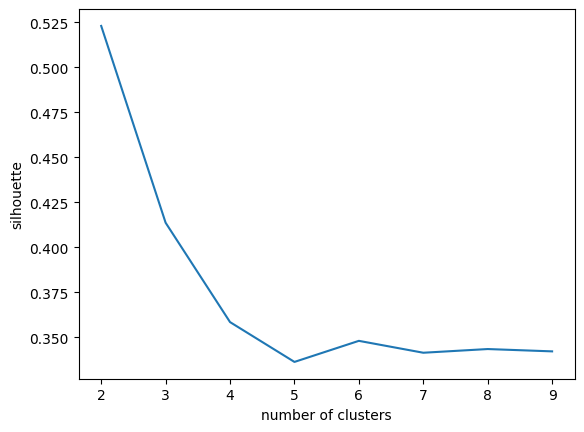

In [9]:
## K-means model

inertia = []
silhouette = []
for i in range(2, 10):
    km = KMeans(n_clusters=i, random_state=42)
    km.fit(Xs)
    inertia.append(km.inertia_)
    silhouette.append(silhouette_score(X, km.fit_predict(X)))
    
sns.lineplot(y = inertia, x = range(2,10))
plt.xlabel("number of clusters")
plt.ylabel("inertia")
plt.show()

sns.lineplot(y = silhouette, x = range(2,10))
plt.xlabel("number of clusters")
plt.ylabel("silhouette");

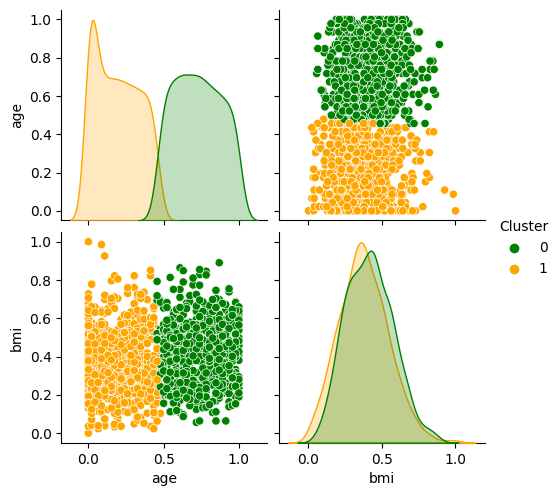

In [10]:
n_clust = 2

km = KMeans(n_clusters=n_clust, random_state=42)
km.fit(Xs)
#df1 = pd.DataFrame(Xs)
#df1.columns = features
df1['Cluster'] = km.labels_
my_colours = ['green','orange', 'blue', 'magenta', 'yellow', 'cyan', 'grey']
sns.pairplot(data = df1, hue = 'Cluster', palette=my_colours[:n_clust]);

In [11]:
pd.crosstab(y, df1['Cluster'])


Cluster,0,1
row_0,,
0,226,329
1,444,339


In [12]:
chi2_contingency(pd.crosstab(y, df1['Cluster']))

(32.556566827119696,
 1.1577328950168104e-08,
 1,
 array([[277.91479821, 277.08520179],
        [392.08520179, 390.91479821]]))

### Optional: Bank customer segmentation

Using the Churn dataset, help the Bank customize their retetion strategy by identifying a few distinct customer segments 

**Features**

- __CreditScore:__	Customer’s credit score
- __Age:__	Customer’s age
- __Tenure:__	Number of years that the customer has been a client of the bank
- __EstimatedSalary:__	Customer’s salary estimated from the customer’s bank product usage patterns



#### 1. Data import, inspection and preparation

- Import the Churn dataset as a Pandas dataframe
- Inspect the data
- Select the following four numerical columns for cluster anaysis: ['CreditScore', 'Age', 'Tenure', 'EstimatedSalary']
- Trasform the data subset into a numpy array and scale the data using the min-max scaler

`df = pd.read_csv("../data/Churn_Modeling.csv")`

`df = df.iloc[:, 2:]`

`df.info()`

`features = ['CreditScore', 'Age', 'Tenure', 'EstimatedSalary']`

`X = df[features].to_numpy()`

`scaler = MinMaxScaler()`

`Xs = scaler.fit_transform(X)`

#### 2. Create and optimize a K-means model

- Plot a knee curve for model inertia and choose an optimum number of clusters
- For the selected number of clusters, train a K-means model
- Create a pairplot of your data and color-code it by the cluster label. Inspect the resuting cluster structure